In [1]:
import json
from datetime import datetime, timedelta
import matplotlib.pylab as plot
import matplotlib.pyplot as plt
from matplotlib import dates
import pandas as pd
import numpy as np

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Read data from http bro logs
with open("http.log",'r') as infile:
    file_data = infile.read()
    
# Split file by newlines
file_data = file_data.split('\n')

# Remove comment lines
http_data = []
for line in file_data:
    if line[0] is not None and line[0] != "#":
        http_data.append(line)

In [3]:
# Lets analyze user agents
user_agent_analysis = {}
user_agent_overall = {}
for line in http_data:
    # Extract the timestamp
    timestamp = datetime.fromtimestamp(float(line.split('\t')[0]))
    # Strip second and microsecond from timestamp
    timestamp = str(timestamp.replace(second=0,microsecond=0))
    
    # Extract the user agent
    user_agent = line.split('\t')[11]
    
    # Update status code analysis variable
    if user_agent not in user_agent_analysis.keys():
        user_agent_analysis[user_agent] = {timestamp: 1}
    else:
        if timestamp not in user_agent_analysis[user_agent].keys():
            user_agent_analysis[user_agent][timestamp] = 1
        else:
            user_agent_analysis[user_agent][timestamp] += 1
            
    # Update overall user agent count
    if user_agent not in user_agent_overall.keys():
        user_agent_overall[user_agent] = 1
    else:
        user_agent_overall[user_agent] += 1

In [4]:
df = pd.DataFrame.from_dict(user_agent_analysis,orient='columns').fillna(0)
df

,-,"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.64 Safari/537.36",Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:39.0) Gecko/20100101 Firefox/39.0,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:41.0) Gecko/20100101 Firefox/41.0,Mozilla/5.0 (compatible; Nmap Scripting Engine; http://nmap.org/book/nse.html),Wget/1.16.1 (linux-gnu)
2015-10-21 05:09:00,29.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 05:10:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 05:11:00,21.0,0.0,0.0,0.0,0.0,132.0,0.0
2015-10-21 05:12:00,7.0,0.0,0.0,0.0,0.0,21.0,0.0
2015-10-21 06:02:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:03:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:04:00,1.0,2.0,0.0,0.0,0.0,15.0,0.0
2015-10-21 06:05:00,19.0,377.0,0.0,0.0,0.0,3.0,0.0
2015-10-21 06:06:00,0.0,1196.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:07:00,0.0,993.0,0.0,0.0,0.0,0.0,0.0


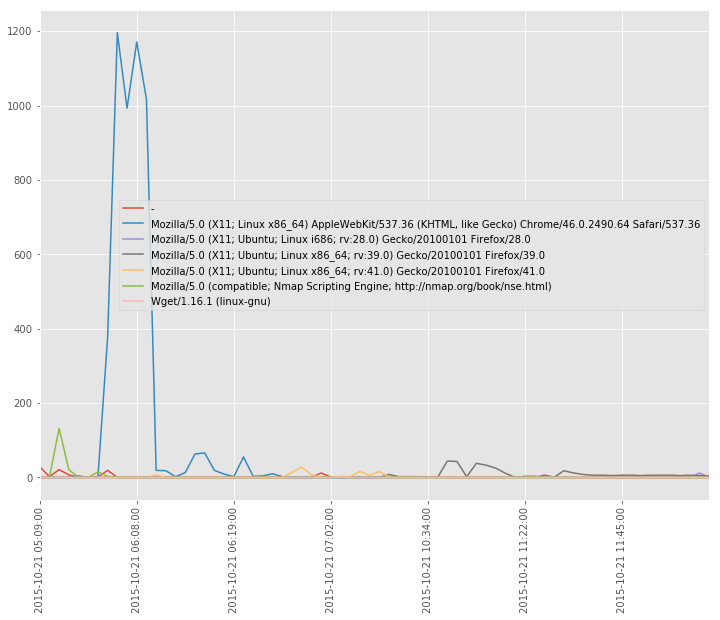

In [5]:
#df.plot(figsize=(12,9))

ax = df.plot(rot=90,figsize=(12,9))

In [6]:
user_agent_analysis2 = user_agent_analysis
print(user_agent_analysis2.keys())
high_volume_user_agents = [
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.64 Safari/537.36"
]
for ua in high_volume_user_agents:    
    if ua in user_agent_analysis2.keys():
        del user_agent_analysis2[ua]
df2 = pd.DataFrame.from_dict(user_agent_analysis2,orient='columns').fillna(0)
df2

['Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:39.0) Gecko/20100101 Firefox/39.0', 'Mozilla/5.0 (compatible; Nmap Scripting Engine; http://nmap.org/book/nse.html)', '-', 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.64 Safari/537.36', 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:41.0) Gecko/20100101 Firefox/41.0', 'Wget/1.16.1 (linux-gnu)']


,-,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:39.0) Gecko/20100101 Firefox/39.0,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:41.0) Gecko/20100101 Firefox/41.0,Mozilla/5.0 (compatible; Nmap Scripting Engine; http://nmap.org/book/nse.html),Wget/1.16.1 (linux-gnu)
2015-10-21 05:09:00,29.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 05:10:00,2.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 05:11:00,21.0,0.0,0.0,0.0,132.0,0.0
2015-10-21 05:12:00,7.0,0.0,0.0,0.0,21.0,0.0
2015-10-21 06:03:00,1.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:04:00,1.0,0.0,0.0,0.0,15.0,0.0
2015-10-21 06:05:00,19.0,0.0,0.0,0.0,3.0,0.0
2015-10-21 06:10:00,0.0,0.0,0.0,7.0,0.0,0.0
2015-10-21 06:27:00,0.0,0.0,0.0,14.0,0.0,0.0
2015-10-21 06:28:00,0.0,0.0,0.0,28.0,0.0,0.0


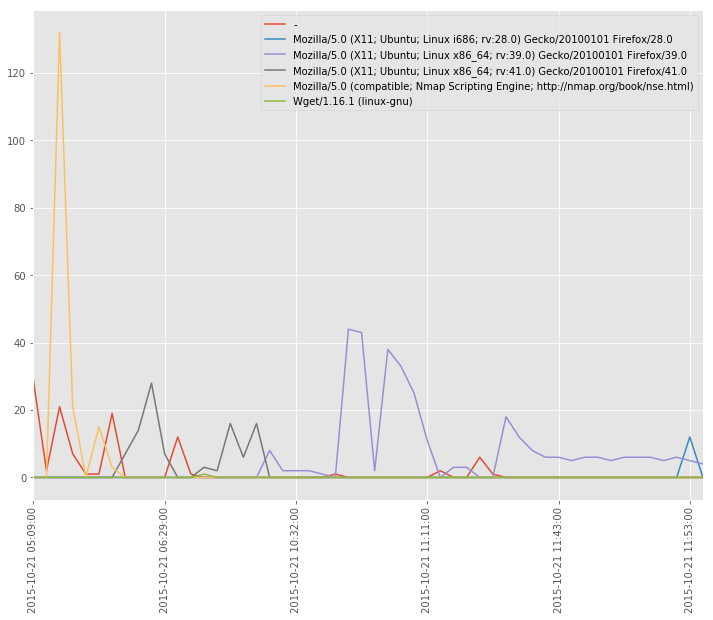

In [7]:
df2.plot(rot=90,figsize=(12,9))

In [8]:
# Lets analyze status codes
status_code_analysis = {}
status_code_overall = {}
earliest_time = None
latest_time = None
for line in http_data:
    # Extract the timestamp
    timestamp = datetime.fromtimestamp(float(line.split('\t')[0]))
    # Strip minute, second and microsecond from timestamp
    #timestamp = str(timestamp.replace(minute=0,second=0,microsecond=0))
    timestamp = str(timestamp.replace(second=0,microsecond=0))
    
    # Extract the status code
    status_code = line.split('\t')[14]
    
    # Update status code analysis variable
    if status_code not in status_code_analysis.keys():
        status_code_analysis[status_code] = {timestamp: 1}
    else:
        if timestamp not in status_code_analysis[status_code].keys():
            status_code_analysis[status_code][timestamp] = 1
        else:
            status_code_analysis[status_code][timestamp] += 1
            
    # Update overall status code count
    if status_code not in status_code_overall.keys():
        status_code_overall[status_code] = 1
    else:
        status_code_overall[status_code] += 1
    
    # Update our earliest and latest time as needed
    if earliest_time is None or timestamp < earliest_time:
        earliest_time = timestamp
    if latest_time is None or timestamp > latest_time:
        latest_time = timestamp

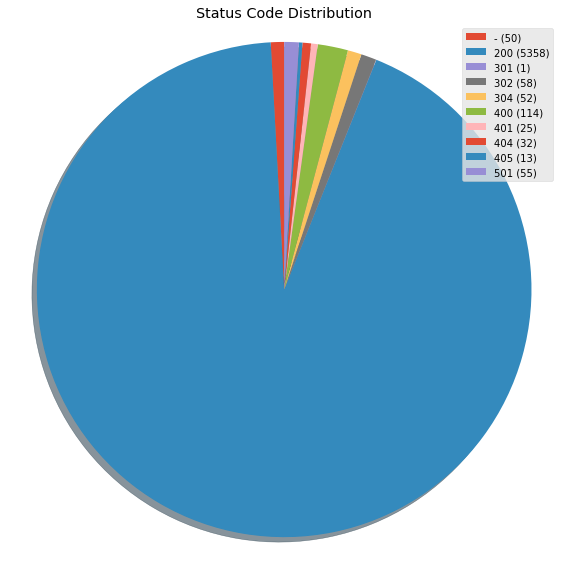

In [9]:
# Format data for the plot function
status_label = []
data = []
for code in sorted(status_code_overall.keys()):
    status_label.append(str(code) + " (" + str(status_code_overall[code]) + ")")
    data.append(status_code_overall[code])

plot.figure(1,figsize=[8,8])
patches, texts = plot.pie(data, shadow=True, startangle=90)
plot.legend(patches, status_label,loc="best")
plot.title('Status Code Distribution')
plot.axis('equal')
plot.tight_layout()
plot.show()

In [10]:
# Output the status codes in table form
df = pd.DataFrame.from_dict(status_code_analysis,orient='columns').fillna(0)
df

,-,200,301,302,304,400,401,404,405,501
2015-10-21 05:09:00,8.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,10.0
2015-10-21 05:10:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 05:11:00,8.0,18.0,0.0,13.0,0.0,39.0,11.0,14.0,11.0,39.0
2015-10-21 05:12:00,0.0,0.0,0.0,0.0,0.0,22.0,0.0,2.0,2.0,2.0
2015-10-21 06:02:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
2015-10-21 06:03:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:04:00,4.0,1.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,0.0
2015-10-21 06:05:00,1.0,376.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0
2015-10-21 06:06:00,0.0,1196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-21 06:07:00,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


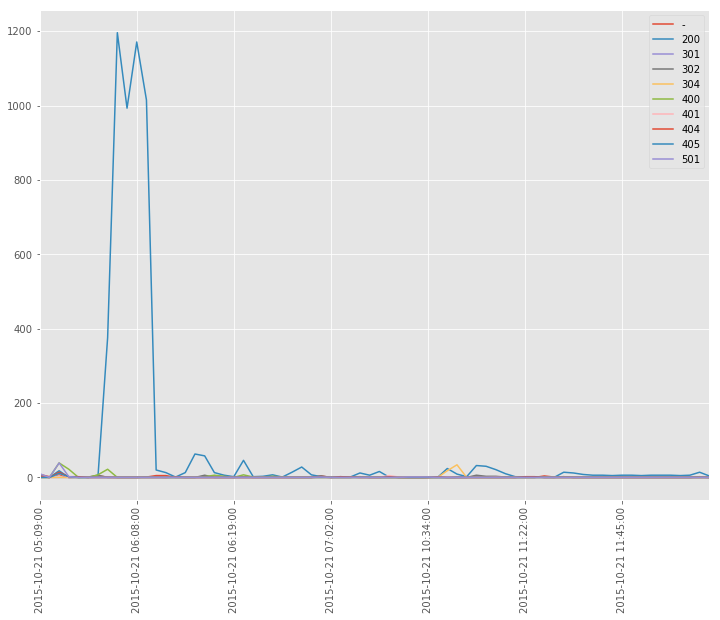

In [11]:
# Plot the status codes
df.plot(rot=90,figsize=(12,9))

['304', '301', '302', '-', '405', '404', '401', '400', '501']


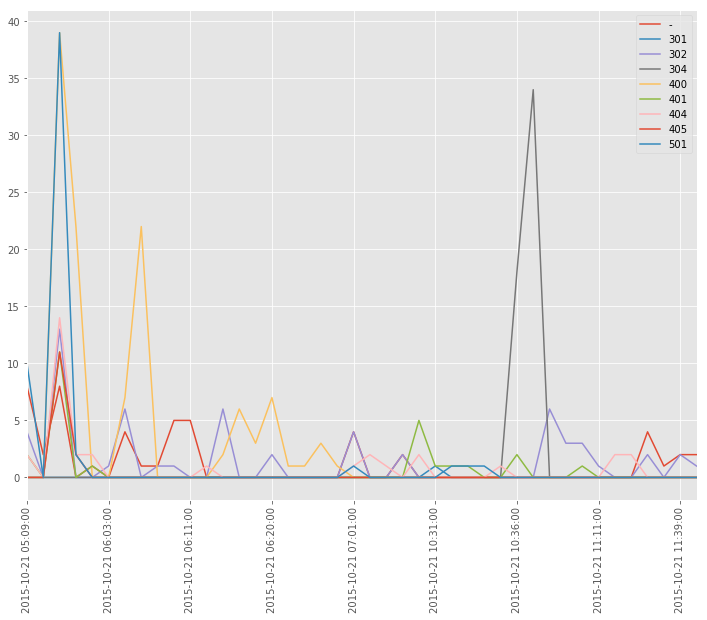

In [12]:
# Remove the 200 status code and re-plot the status codes
status_code_analysis2 = status_code_analysis
if '200' in status_code_analysis2.keys():
    del status_code_analysis2['200']
print(status_code_analysis2.keys())
df2 = pd.DataFrame.from_dict(status_code_analysis2,orient='columns').fillna(0)
df2.plot(rot=90, figsize=(12,9))